# MARKET SEGMENTATION
Analysing the Electric Vehicle market in India using Segmentation analysis and coming up with a feasible strategy to enter the market, targeting the segments most likely to use Electric vehicles.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore",category = DeprecationWarning)

# DATA Pre processing

In [156]:
df=pd.read_csv('https://raw.githubusercontent.com/SatyamSarmah/Ev-Market-Segmentation-Feynn-Labs/main/Behavourial%20study%20of%20Indian%20automoble%20buyers.csv')
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [157]:
df.shape

(99, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [6]:
df.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [7]:
df.columns

Index(['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Personal loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary',
       'Total Salary', 'Make', 'Price'],
      dtype='object')

In [8]:
for col in ['Profession','Marrital Status','Education','Personal loan','House Loan','Wife Working','Make']:
  print(col,':',df[col].unique())

Profession : ['Salaried' 'Business']
Marrital Status : ['Single' 'Married']
Education : ['Post Graduate' 'Graduate']
Personal loan : ['Yes' 'No']
House Loan : ['No' 'Yes']
Wife Working : ['No' 'Yes' 'm']
Make : ['i20' 'Ciaz' 'Duster' 'City' 'SUV' 'Baleno' 'Verna' 'Luxuray' 'Creata']


In [9]:
for col in df.columns:
  print(df[col].value_counts)

<bound method IndexOpsMixin.value_counts of 0     27
1     35
2     45
3     41
4     31
      ..
94    27
95    50
96    51
97    51
98    51
Name: Age, Length: 99, dtype: int64>
<bound method IndexOpsMixin.value_counts of 0     Salaried
1     Salaried
2     Business
3     Business
4     Salaried
        ...   
94    Business
95    Salaried
96    Business
97    Salaried
98    Salaried
Name: Profession, Length: 99, dtype: object>
<bound method IndexOpsMixin.value_counts of 0      Single
1     Married
2     Married
3     Married
4     Married
       ...   
94     Single
95    Married
96    Married
97    Married
98    Married
Name: Marrital Status, Length: 99, dtype: object>
<bound method IndexOpsMixin.value_counts of 0     Post Graduate
1     Post Graduate
2          Graduate
3     Post Graduate
4     Post Graduate
          ...      
94         Graduate
95    Post Graduate
96         Graduate
97    Post Graduate
98    Post Graduate
Name: Education, Length: 99, dtype: object>
<bound met

# DATA CLEANING

In [10]:
df.isnull().sum()/df.shape[0]*100.0

Age                 0.0
Profession          0.0
Marrital Status     0.0
Education           0.0
No of Dependents    0.0
Personal loan       0.0
House Loan          0.0
Wife Working        0.0
Salary              0.0
Wife Salary         0.0
Total Salary        0.0
Make                0.0
Price               0.0
dtype: float64

In [11]:
df.loc[df['Wife Working']== 'm']

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
11,35,Salaried,Married,Graduate,4,Yes,Yes,m,1400000,0,1400000,Baleno,700000


In [12]:
df=df.replace(to_replace = 'm', value="No")
df.loc[11]

Age                       35
Profession          Salaried
Marrital Status      Married
Education           Graduate
No of Dependents           4
Personal loan            Yes
House Loan               Yes
Wife Working              No
Salary               1400000
Wife Salary                0
Total Salary         1400000
Make                  Baleno
Price                 700000
Name: 11, dtype: object

# Behavioral and Psychographic Analysis

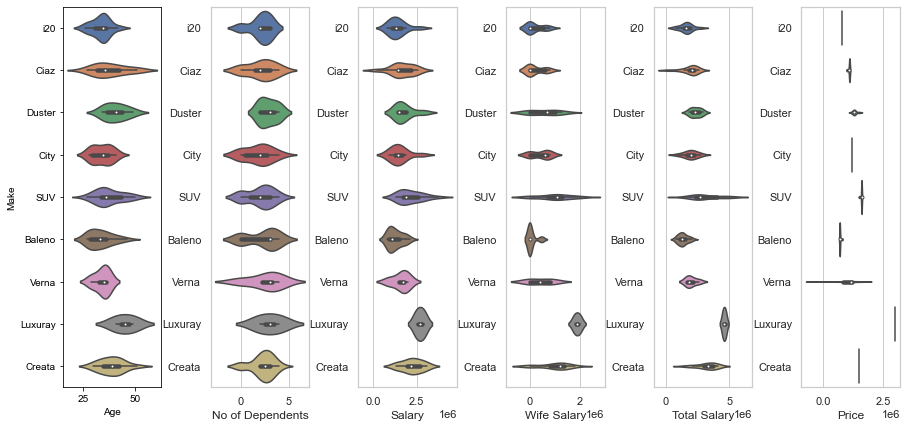

In [13]:
plt.figure(1,figsize=(15,7))
n=0
for cols in ['Age','No of Dependents','Salary','Wife Salary','Total Salary','Price']:
  n+=1
  plt.subplot(1,6,n)
  sns.set(style='whitegrid')
  plt.subplots_adjust(hspace=0.5,wspace=0.5)
  sns.violinplot(x=cols,y='Make',data=df)
  plt.ylabel("Make" if n==1 else '')

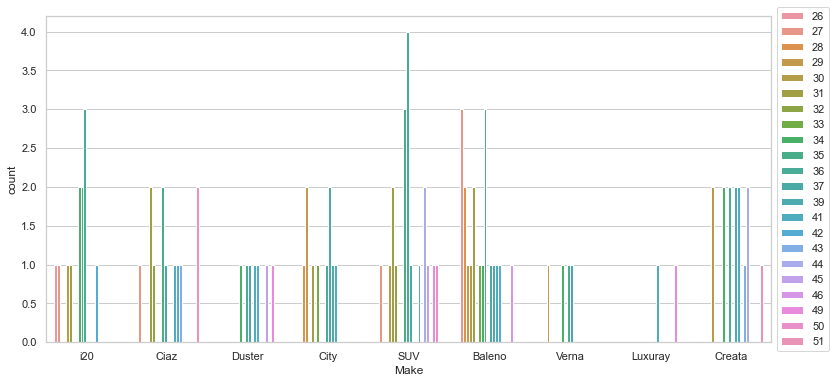

In [14]:
plt.figure(figsize=(13,6))
sns.countplot(x="Make", data=df, hue="Age")
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))

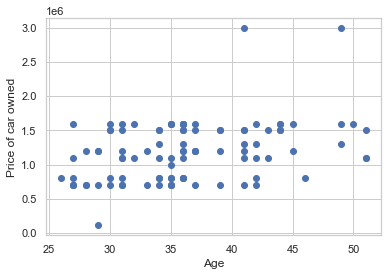

In [15]:
plt.xlabel('Age')
plt.ylabel('Price of car owned')
plt.scatter(df['Age'],df['Price'])

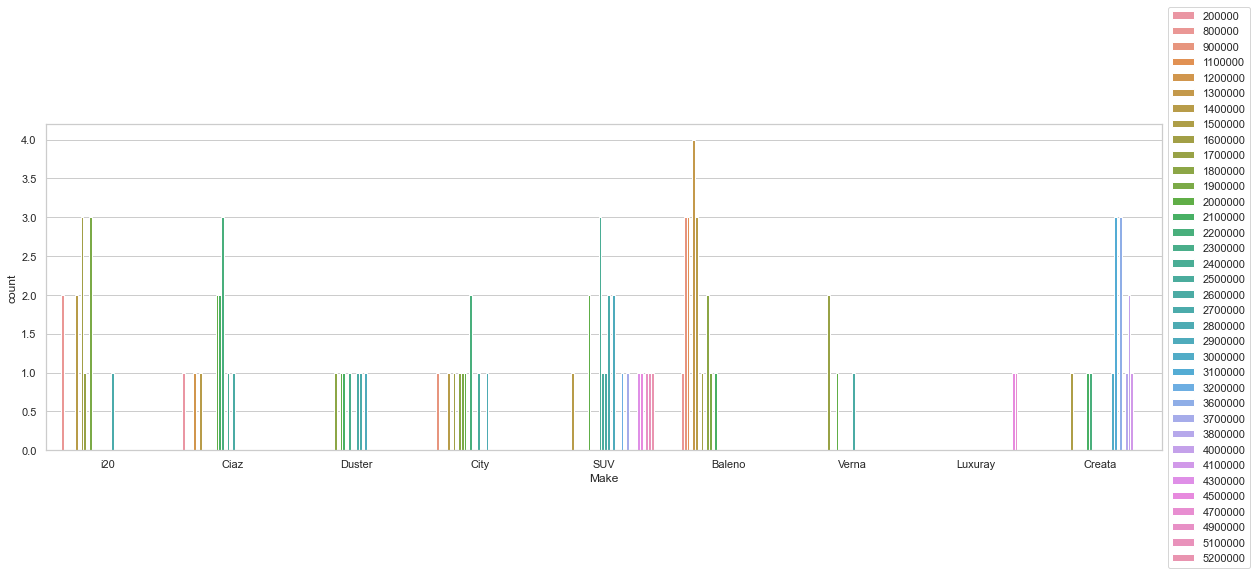

In [16]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make",data=df,hue="Total Salary")
plt.legend(loc='center left',bbox_to_anchor=(1,0.5))

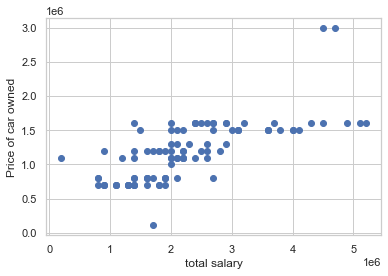

In [17]:
plt.xlabel('total salary')
plt.ylabel('Price of car owned')
plt.scatter(df['Total Salary'],df['Price'])

Relation between number of dependents on a consumer and the vehicles they tend to purchase

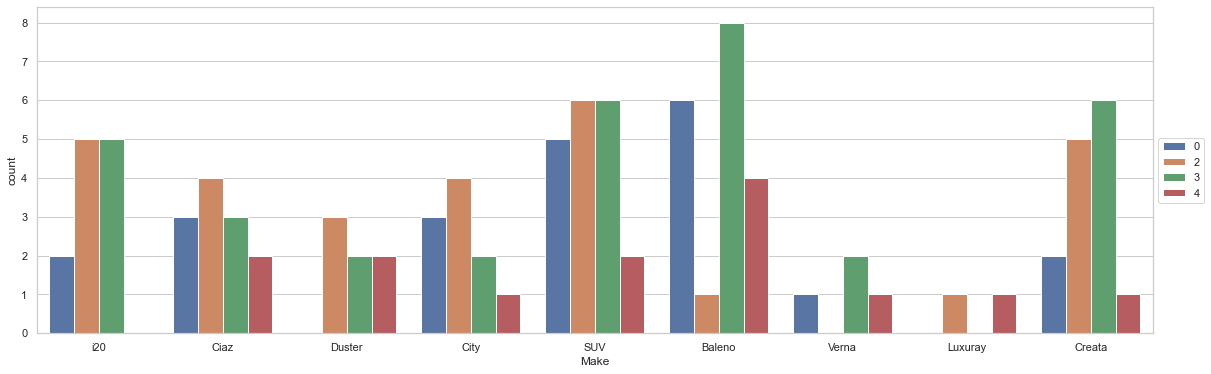

In [18]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make",data=df,hue="No of Dependents")
plt.legend(loc="center left",bbox_to_anchor=(1,0.5))

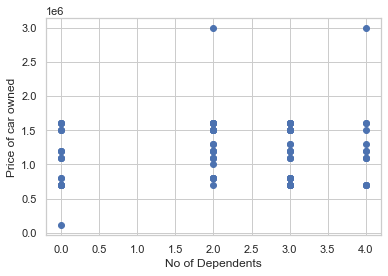

In [19]:
plt.xlabel('No of Dependents')
plt.ylabel('Price of car owned')
plt.scatter(df['No of Dependents'],df['Price'])

Relation between consumers education and the vehicles purchased

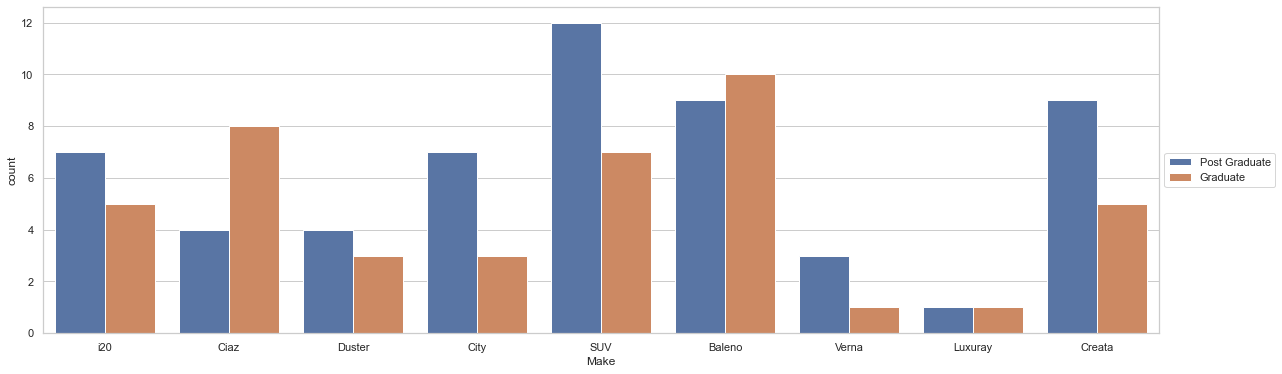

In [20]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make",data=df,hue="Education")
plt.legend(loc="center left",bbox_to_anchor=(1,0.5))

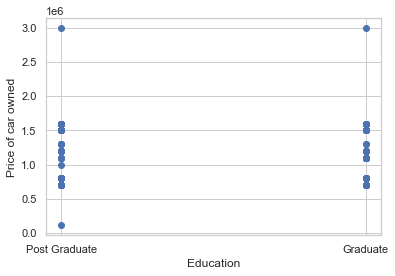

In [21]:
plt.xlabel('Education')
plt.ylabel('Price of car owned')
plt.scatter(df['Education'],df['Price'])

Relation between consumers loan status (indicator of purchasing power) and the vehicles they tend to purchase.

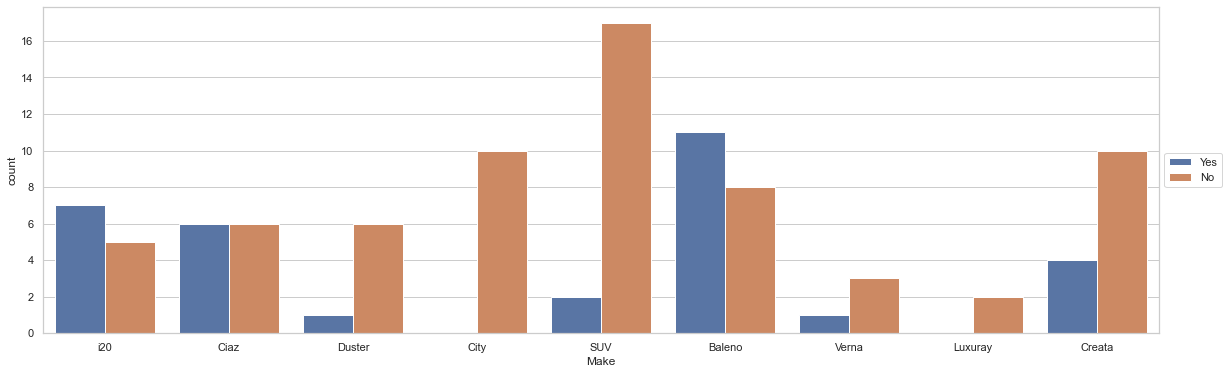

In [22]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="Personal loan")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

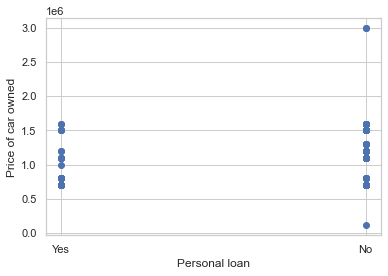

In [23]:
plt.xlabel('Personal loan')
plt.ylabel('Price of car owned')
plt.scatter(df['Personal loan'],df['Price'])

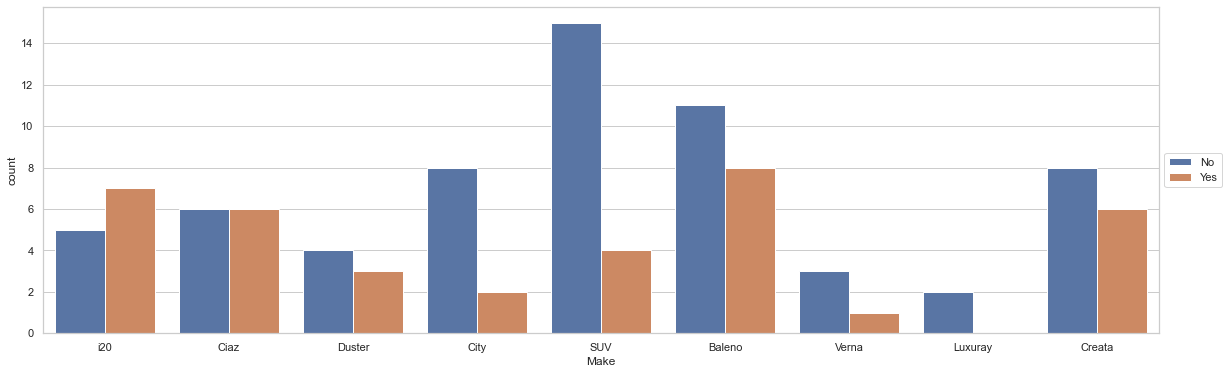

In [24]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="House Loan")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

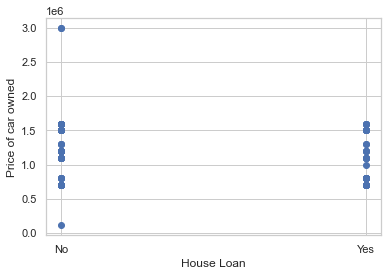

In [25]:
plt.xlabel('House Loan')
plt.ylabel('Price of car owned')
plt.scatter(df['House Loan'],df['Price'])

# DEMOGRAPHIC ANALYSIS

C:\Users\Satyam\Documents\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Satyam\Documents\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Satyam\Documents\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

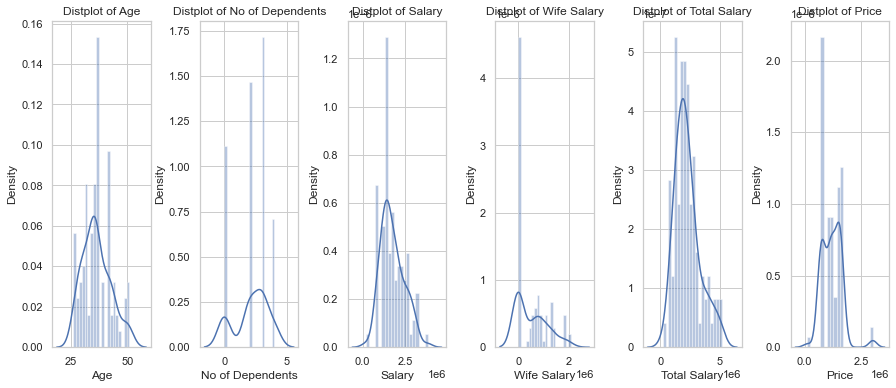

In [26]:
plt.figure(1, figsize=(15,6))
n=0
for x in ['Age', 'No of Dependents' ,'Salary'  ,'Wife Salary'  ,'Total Salary'  ,'Price']:
  n += 1
  plt.subplot(1,6,n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.distplot(df[x], bins = 20)
  plt.title('Distplot of {}'.format(x))
plt.show()

### OBSERVATIONS :

> People from age 25 to 50 make up most of the consumer market.
> Most people having an average total salary of around 30 lakhs tend to purchase more.
> Most people spent 10 to 20 lakh for buying vehicles.

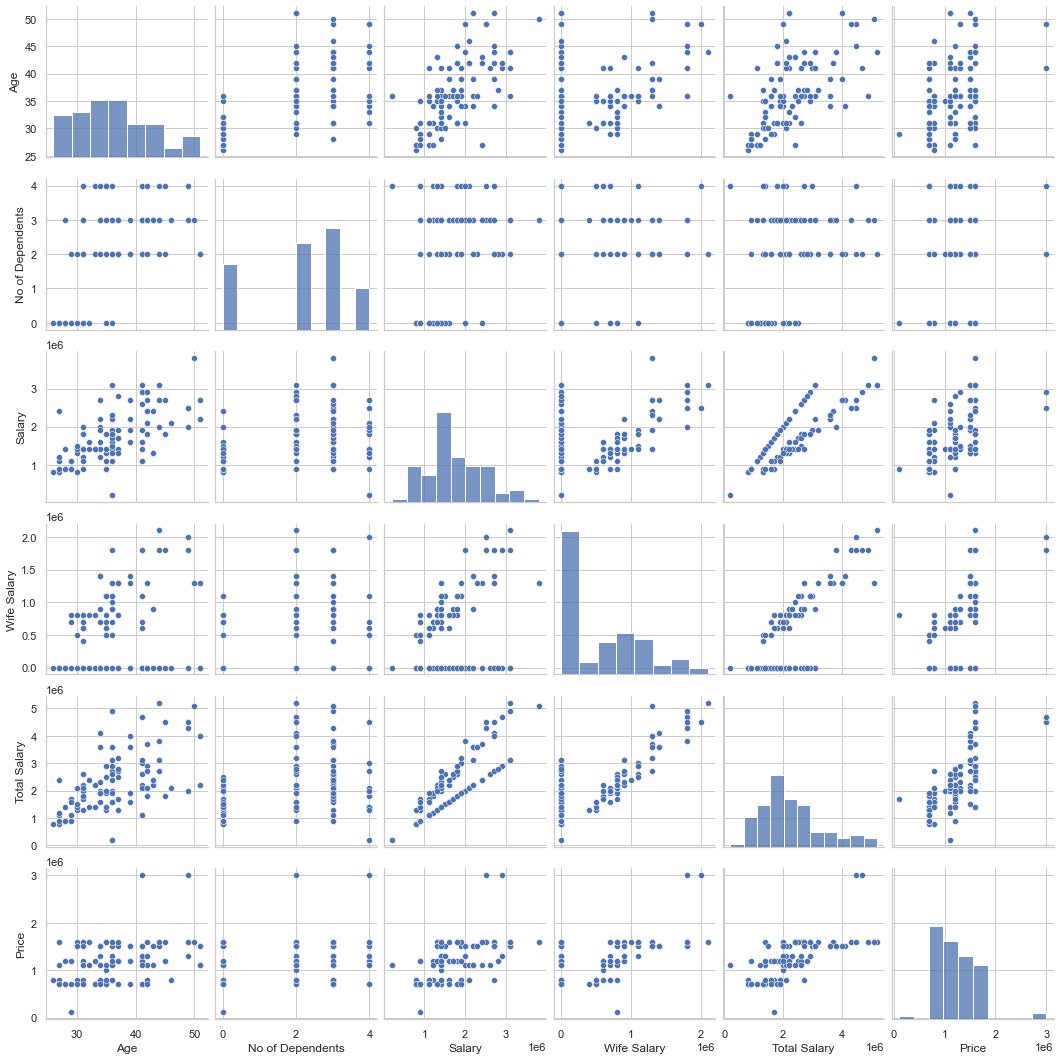

In [27]:
sns.pairplot(df)

# GEOGRAPHIC ANALYSIS

In [158]:
data=pd.read_csv('https://raw.githubusercontent.com/SatyamSarmah/Ev-Market-Segmentation-Feynn-Labs/main/EV%20Statistics%20of%20the%20indian%20States.csv')
data

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,Meghalaya,0,0,0,0,0,6,0,6
1,2,Nagaland,0,20,3,0,0,1,0,24
2,3,Manipur,16,8,11,0,5,12,0,52
3,4,Tripura,28,9,36,0,0,8,0,81
4,5,Andaman & Nicobar islands,0,0,0,0,0,82,0,82
5,6,Himachal Pradesh,0,0,0,0,0,98,0,98
6,7,Jammu & Kashmir,2,76,152,0,0,208,0,438
7,8,Goa,0,0,0,0,0,513,1,514
8,9,Dadra and Nagar Haveli,4,0,9,0,0,803,0,816
9,10,Jharkhand,75,228,736,9,7,655,0,1710


# DATA VISULATIZATION

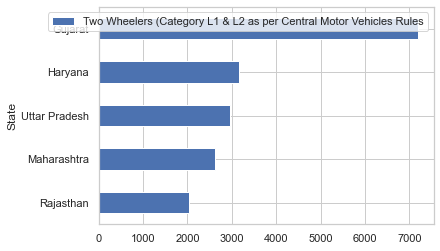

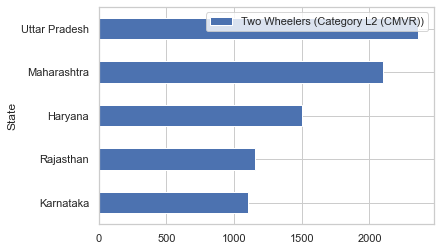

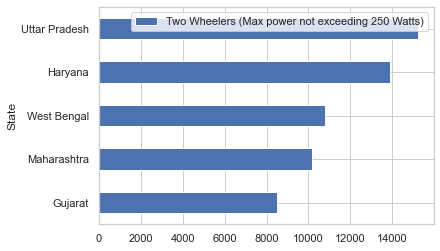

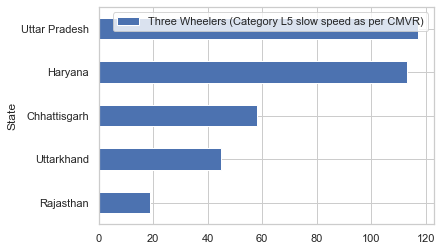

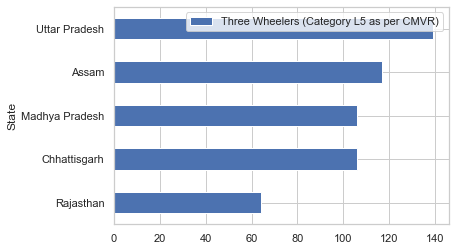

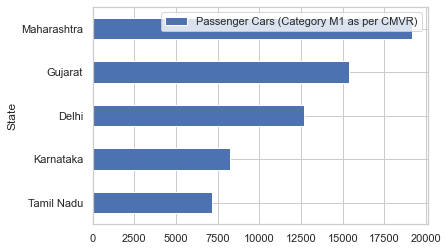

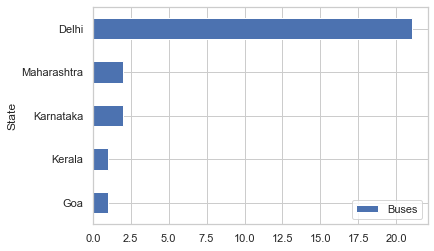

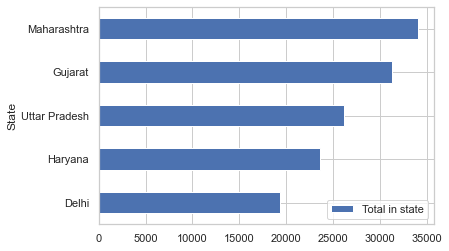

In [29]:
for y in ['Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules','Two Wheelers (Category L2 (CMVR))','Two Wheelers (Max power not exceeding 250 Watts)','Three Wheelers (Category L5 slow speed as per CMVR)','Three Wheelers (Category L5 as per CMVR)','Passenger Cars (Category M1 as per CMVR)','Buses','Total in state']:
  ax=data.sort_values(y,ascending=True).tail(5).plot.barh(x='State',y=y)

### OBSERVATION 

Based on the type of electric vehicle, specific states with higher concentration of them can be targeted for greater sale.

# MODEL DEPLOYMENT

### K-MEANS CLUSTERING


K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:

The centroids of the K clusters, which can be used to label new data.
Labels for the training data (each data point is assigned to a single cluster) . The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

In [30]:
X=df.iloc[:,df.columns!='Make']
X.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,1600000


In [31]:
encoding={"Profession":{"Salaried":0,"Business":1},
          "Marrital Status":{"Single":0,"Married":1},
          "Education":{"Graduate":0,"Post Graduate":1},
          "Personal loan":{"No":0,"Yes":1},
          "House Loan":{"No":0,"Yes":1},
          "Wife Working":{"No":0,"Yes":1}}

In [32]:
obj_df=X.replace(encoding)
obj_df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price
0,27,0,0,1,0,1,0,0,800000,0,800000,800000
1,35,0,1,1,2,1,1,1,1400000,600000,2000000,1000000
2,45,1,1,0,4,1,1,0,1800000,0,1800000,1200000
3,41,1,1,1,3,0,0,1,1600000,600000,2200000,1200000
4,31,0,1,1,2,1,0,1,1800000,800000,2600000,1600000


In [168]:
####K-Means Algorithm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [100]:
X_scaled = StandardScaler().fit_transform(obj_df)
# X_scaled = df.iloc[:, [3,4]].values  
X_scaled = pd.DataFrame(X_scaled,columns=['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
                                          'Personal loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary',
                                          'Total Salary','Price'])
x=X_scaled.to_numpy()
X_scaled

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price
0,-1.498630,-0.739510,-2.366432,0.876275,-1.642313,1.446980,-0.772512,-1.051847,-1.397118,-0.887055,-1.406760,-0.904843
1,-0.211304,-0.739510,0.422577,0.876275,-0.136859,1.446980,1.294479,0.950708,-0.501877,0.108995,-0.258937,-0.445579
2,1.397855,1.352247,0.422577,-1.141195,1.368594,1.446980,1.294479,-1.051847,0.094950,-0.887055,-0.450240,0.013685
3,0.754191,1.352247,0.422577,0.876275,0.615867,-0.691095,-0.772512,0.950708,-0.203464,0.108995,-0.067633,0.013685
4,-0.854967,-0.739510,0.422577,0.876275,-0.136859,1.446980,-0.772512,0.950708,0.094950,0.441012,0.314975,0.932213
...,...,...,...,...,...,...,...,...,...,...,...,...
94,-1.498630,1.352247,-2.366432,-1.141195,-1.642313,-0.691095,-0.772512,-1.051847,0.990190,-0.887055,0.123671,0.932213
95,2.202434,-0.739510,0.422577,0.876275,0.615867,-0.691095,-0.772512,0.950708,3.079085,1.271054,2.706274,0.932213
96,2.363350,1.352247,0.422577,-1.141195,-0.136859,1.446980,1.294479,-1.051847,0.691777,-0.887055,-0.067633,-0.215947
97,2.363350,-0.739510,0.422577,0.876275,-0.136859,-0.691095,-0.772512,0.950708,1.437811,1.271054,1.654102,0.702581


In [69]:
x

array([[-1.4986304 , -0.73950997, -2.36643191, ..., -0.88705464,
        -1.40676   , -0.90484292],
       [-0.21130364, -0.73950997,  0.42257713, ...,  0.10899537,
        -0.25893659, -0.44557889],
       [ 1.39785482,  1.35224681,  0.42257713, ..., -0.88705464,
        -0.4502405 ,  0.01368514],
       ...,
       [ 2.36334989,  1.35224681,  0.42257713, ..., -0.88705464,
        -0.06763269, -0.21594688],
       [ 2.36334989, -0.73950997,  0.42257713, ...,  1.27105372,
         1.65410242,  0.70258119],
       [ 2.36334989, -0.73950997,  0.42257713, ..., -0.88705464,
        -0.06763269, -0.21594688]])

In [70]:
X_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               99 non-null     float64
 1   Profession        99 non-null     float64
 2   Marrital Status   99 non-null     float64
 3   Education         99 non-null     float64
 4   No of Dependents  99 non-null     float64
 5   Personal loan     99 non-null     float64
 6   House Loan        99 non-null     float64
 7   Wife Working      99 non-null     float64
 8   Salary            99 non-null     float64
 9   Wife Salary       99 non-null     float64
 10  Total Salary      99 non-null     float64
 11  Price             99 non-null     float64
dtypes: float64(12)
memory usage: 9.4 KB


In [141]:
wc=[]
for i in range(2,11):
        km = KMeans(n_clusters=i)
        km.fit(X_scaled)
        wc.append(km.inertia_)

In [142]:
wc

[925.4652453535301,
 744.3928340032234,
 631.5343342844963,
 559.1787563719057,
 513.2615366421913,
 487.9446827883406,
 449.2794035296073,
 429.612015253028,
 409.16803785456733]

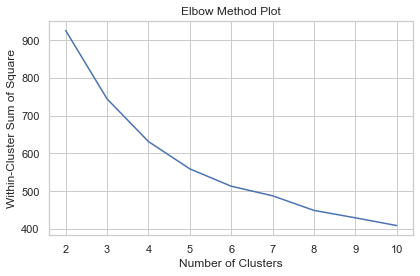

In [143]:
plt.plot(range(2, 11), wc)
plt.title('Elbow Method Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Square') # Within cluster sum of squares
plt.tight_layout()
plt.show()

In [165]:
###K=3
km = KMeans(n_clusters = 3, init = 'k-means++', 
                    max_iter = 300, n_init = 10,random_state = 42)
km.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [145]:
y = km.predict(X_scaled)
y_df = pd.DataFrame(y,columns=['Class'])

In [146]:
final_data = pd.concat([df,y_df],axis=1) 
final_data

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,Class
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000,0
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000,1
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000,1
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000,2
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000,0
95,50,Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000,2
96,51,Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000,1
97,51,Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,Creata,1500000,2


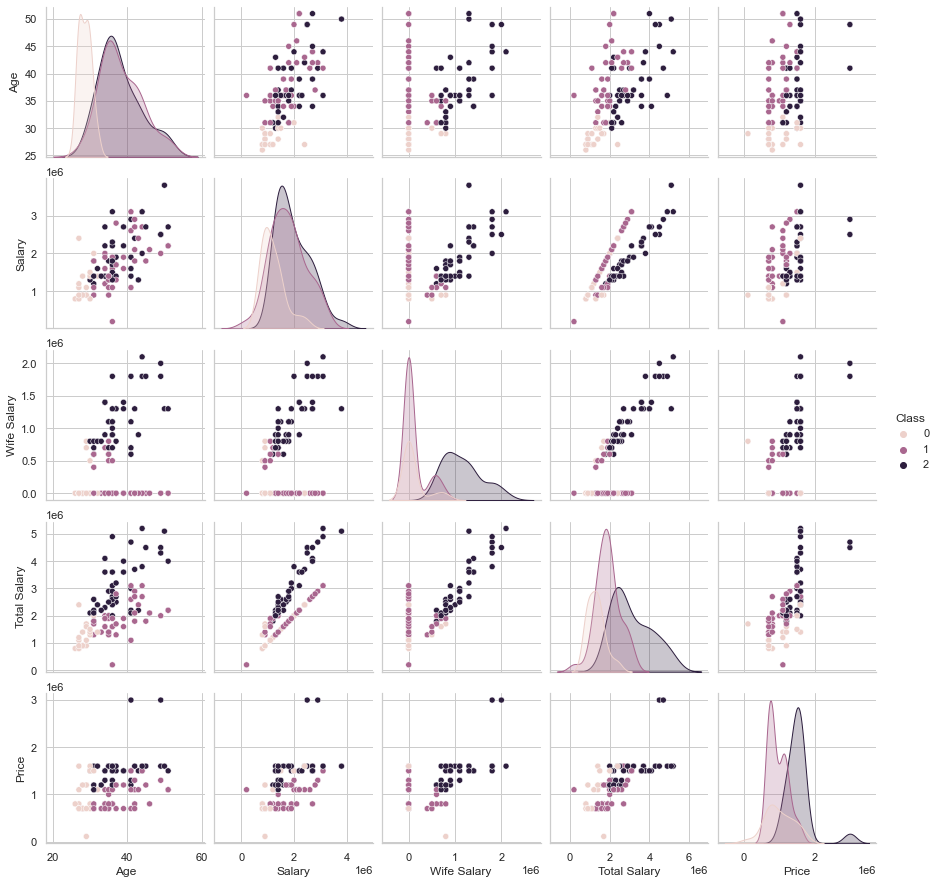

In [147]:
sns.pairplot(final_data,x_vars = ['Age','Salary', 'Wife Salary','Total Salary','Price'], y_vars = ['Age','Salary', 'Wife Salary','Total Salary','Price'], hue='Class')

In [166]:
###K=5
km1 = KMeans(n_clusters = 5, init = 'k-means++', 
                    max_iter = 300, n_init = 10,random_state = 42)
km1.fit(X_scaled)

KMeans(n_clusters=5, random_state=42)

In [149]:
y1 = km1.predict(X_scaled)
y1_df = pd.DataFrame(y1,columns=['Class'])

In [150]:
final_data1 = pd.concat([df,y1_df],axis=1) 
final_data1

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,Class
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000,4
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000,2
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000,2
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000,3
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000,4
95,50,Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000,0
96,51,Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000,2
97,51,Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,Creata,1500000,0


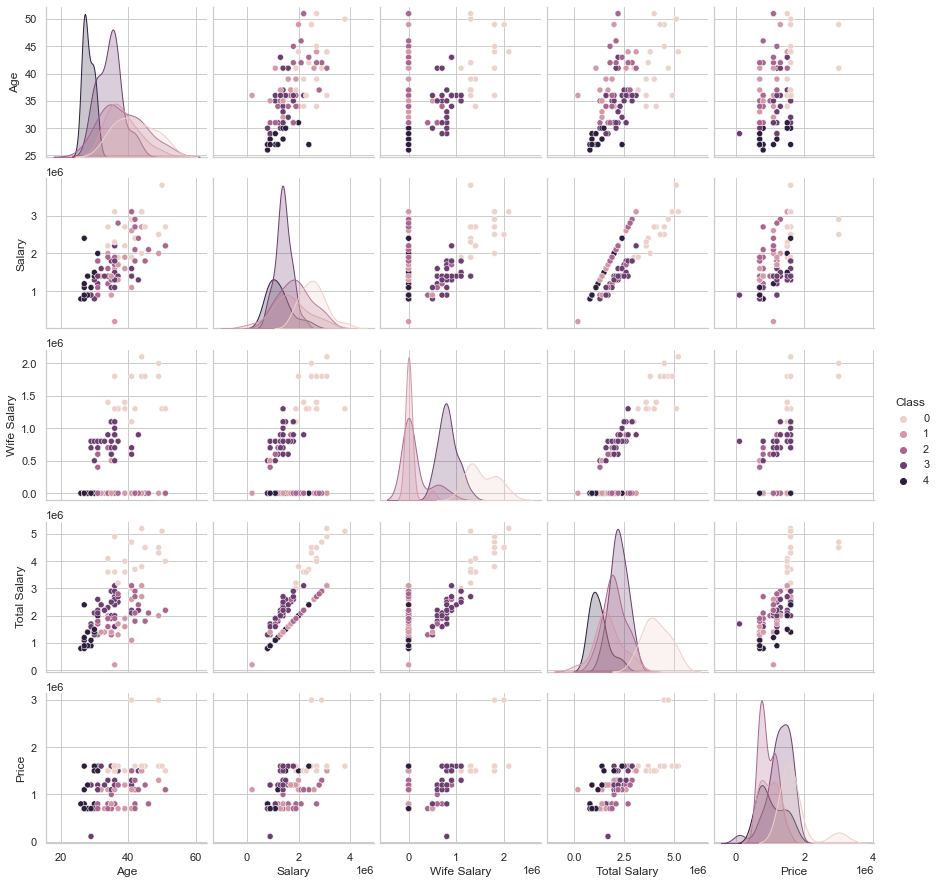

In [151]:
sns.pairplot(final_data1,x_vars = ['Age','Salary', 'Wife Salary','Total Salary','Price'], y_vars = ['Age','Salary', 'Wife Salary','Total Salary','Price'], hue='Class')

In [167]:
###K=7
km2 = KMeans(n_clusters = 7, init = 'k-means++', 
                    max_iter = 300, n_init = 10,random_state = 42)
km2.fit(X_scaled)

KMeans(n_clusters=7, random_state=42)

In [162]:
y2 = km2.predict(X_scaled)
y2_df = pd.DataFrame(y2,columns=['Class'])

In [163]:
final_data2 = pd.concat([df,y2_df],axis=1) 
final_data2

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,Class
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000,5
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000,3
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000,3
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000,2
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000,5
95,50,Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000,4
96,51,Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000,6
97,51,Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,Creata,1500000,4


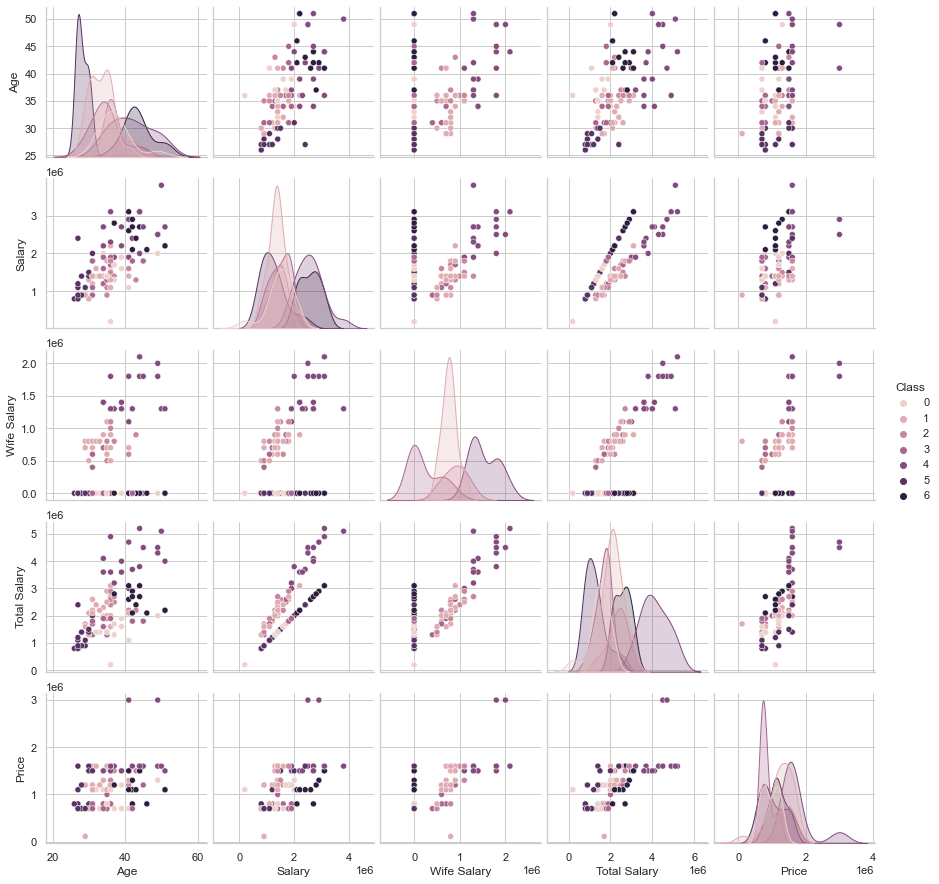

In [164]:
sns.pairplot(final_data2,x_vars = ['Age','Salary', 'Wife Salary','Total Salary','Price'], y_vars = ['Age','Salary', 'Wife Salary','Total Salary','Price'], hue='Class')

Initially we are trying to find the optimal K value using the Elbow Method wherein we will be finding the Within Cluster Sum of 
Square (WCSS) and try to find the point where it rapidly decreases which makes the graph look like an “elbow” there. The K value
corresponding to that point is the optimal K value. After looking into the plot, we can find that there are 2 points at which 
elbows are formed (which can be seen with the slight bent at K=3 and K=5). After finding the possible optimal K value, we will 
try to find the K value which provides us with the right clustering. Therefore we will try to train K-Means Clustering by taking
K = 3 and K = 5. From the behavioral, psychographic, geographic and demographic analysis, we were able to see some attributes
having an impact in the way of grouping consumers. However while looking into the clustered dataset, we were able to find 5 
attributes that contributed most to the clustering (i.e., Age, Salary, Wife Salary, Total Salary, and Price). This can be seen 
in the pairplot done below for both K=3 and K=5 conditions. In this case, we are able to see the dataset being clustered 
naturally. From here we are also able to see that the model is trying to cluster people on the basis of their total income 
wherein :

● Class 1 are the group of people who have Total Salary close to Salary.

● Class 2 is the group of people who have Total Salary higher than Salary.

● Class 0 are the group of people who have Total Salary close to Salary but their total salary is relatively
  less compared to other people.

In this case, we are able to see the dataset is being clustered into very small groups of people that the model recognizes as a 
trend which is however not the case. We don’t want to lose the homogeneity between our segments, therefore, going with K=3 will
give the best results in the clustering analysis that is being done.

# Target Segment

The younger population is more likely to purchase products with new technology, especially Electric Vehicles as they are aware 
of the environmental benefits and would like to bring that change, but our report showed that younger population buys less 
expensive vehicles and so Electric Vehicles not being affordable can be a downside. It is then suggested to target a segment 
which is still eager to try new technologies but financially well enough to be able to afford Electric Vehicles. These people 
are likely to be in an age-group of 30 to 40 years.

People from urban cities with available infrastructure and education about technology and its benefits will tend to purchase 
electric vehicles more. People who are married and who have dependents are more likely to go ahead and purchase a vehicle and 
so they could be targeted. Average salary of people who buy vehicles is around 30 lakh and the most purchases for automobiles 
lies in the range 10-20 lakh and lesser for two-wheelers. These aspects need to be kept in mind too.